In [1]:
!pip install seaborn matplotlib pandas numpy scikit-learn
%matplotlib inline


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sbn

print(sbn.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
df = sbn.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Text(0, 0.5, 'Tip')

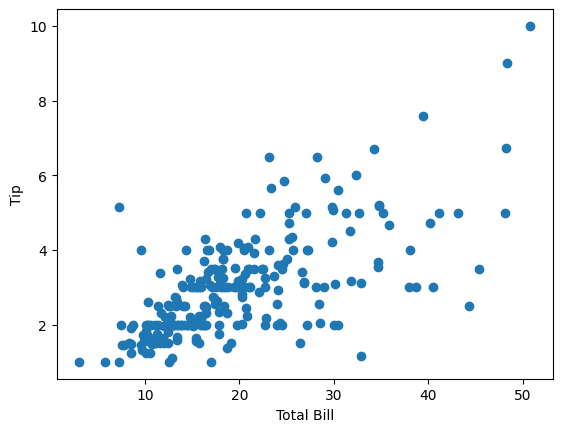

In [6]:
import matplotlib.pyplot as plot
plot.scatter(x='total_bill',y='tip',data=df)
plot.xlabel('Total Bill')
plot.ylabel('Tip')
# sbn.regplot(x='size',y='total_bill',data=tips)
# plot.scatter(x='total_bill',y='tip',data=df)


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
# Upsampling 
from sklearn.utils import resample
df.time.value_counts()


time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [10]:
add_sample_dinner = df[df['time'] == 'Dinner']
tips_linch = df[df['time'] == 'Lunch']

In [11]:
lunch_upsampled = resample(tips_linch,replace=True,n_samples=len(add_sample_dinner),random_state=42)

In [12]:
lunch_upsampled

,total_bill,tip,sex,smoker,day,time,size
196,10.34,2.00,Male,Yes,Thur,Lunch,2
118,12.43,1.80,Female,No,Thur,Lunch,2
205,16.47,3.23,Female,Yes,Thur,Lunch,3
124,12.48,2.52,Female,No,Thur,Lunch,2
127,14.52,2.00,Female,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
119,24.08,2.92,Female,No,Thur,Lunch,4
203,16.40,2.50,Female,Yes,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
123,15.95,2.00,Male,No,Thur,Lunch,2


In [13]:
add_sample_dinner

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
import pandas as pd
upsampled_tips = pd.concat([add_sample_dinner,tips_linch])

In [15]:
upsampled_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,15.98,3.00,Female,No,Fri,Lunch,3
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2


In [16]:
tips = upsampled_tips

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,15.98,3.00,Female,No,Fri,Lunch,3
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2


In [18]:
# Encoding the categorical columns

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [20]:
for i in tips.columns:
    print(i,tips[i].dtypes)

total_bill float64
tip float64
sex category
smoker category
day category
time category
size int64


In [21]:
g = pd.get_dummies(tips,columns=['sex','smoker','day','time'],drop_first=True)

In [22]:
ff = LabelEncoder()
ff.__doc__

'Encode target labels with value between 0 and n_classes-1.\n\n    This transformer should be used to encode target values, *i.e.* `y`, and\n    not the input `X`.\n\n    Read more in the :ref:`User Guide <preprocessing_targets>`.\n\n    .. versionadded:: 0.12\n\n    Attributes\n    ----------\n    classes_ : ndarray of shape (n_classes,)\n        Holds the label for each class.\n\n    See Also\n    --------\n    OrdinalEncoder : Encode categorical features using an ordinal encoding\n        scheme.\n    OneHotEncoder : Encode categorical features as a one-hot numeric array.\n\n    Examples\n    --------\n    `LabelEncoder` can be used to normalize labels.\n\n    >>> from sklearn.preprocessing import LabelEncoder\n    >>> le = LabelEncoder()\n    >>> le.fit([1, 2, 2, 6])\n    LabelEncoder()\n    >>> le.classes_\n    array([1, 2, 6])\n    >>> le.transform([1, 1, 2, 6])\n    array([0, 0, 1, 2]...)\n    >>> le.inverse_transform([0, 0, 1, 2])\n    array([1, 1, 2, 6])\n\n    It can also be 

In [27]:
f = OneHotEncoder(sparse_output=False, drop=None)
tip = sbn.load_dataset('tips')
encoded = f.fit_transform(tip[['smoker']])
columns = f.get_feature_names_out(['smoker'])
print(columns)
# tip[columns] = 
tip[columns] = encoded
# tip
tip['time'].unique()
# tip.drop(['smoker_No','smoker_Yes'],axis=1,inplace=True)
# encoded = f.fit_transform(tip[['smoker']])
# v = pd.DataFrame(encoded)
# tips[['smoker']]
# tip
# encoded

['smoker_No' 'smoker_Yes']


['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [24]:
tip

,total_bill,tip,sex,smoker,day,time,size,smoker_No,smoker_Yes
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.0,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1.0,0.0
